In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, kurtosis


In [2]:
import warnings
warnings.filterwarnings("ignore") # to prevent warning msgs

In [3]:
dataset = pd.read_csv('house_price.csv')

In [4]:
df=pd.DataFrame(dataset)

In [9]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


# Q1. Perform basic Exploratory Data Analysis (EDA)

In [11]:
df.head()  #first few lines

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [13]:
df.info() # no of rows, columns and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


# STEP 2: Missing values

In [15]:
df.isnull() # find missing value and count

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
13195,False,False,False,False,False,False,False
13196,False,False,False,False,False,False,False
13197,False,False,False,False,False,False,False
13198,False,False,False,False,False,False,False


In [206]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

# FOR EDA -Step 3: Descriptive Statistics

In [25]:
df.describe() # it gives -Summary statistics for numerical columns, such as mean, median, standard deviation etc.

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


# STEP 4:Check for Duplicates

In [15]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13195    False
13196    False
13197    False
13198    False
13199     True
Length: 13200, dtype: bool

In [17]:
df.duplicated().sum()

1049

In [19]:
df1=df.drop_duplicates()

In [21]:
df1.duplicated().sum()

0

In [23]:
print("Columns in DataFrame:", df1.columns)

Columns in DataFrame: Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')


# STEP 5 :Categorize Columns (Numerical and Categorical)

In [25]:
numerical_columns = df1.select_dtypes(include=['number']).columns
categorical_columns = df1.select_dtypes(include=['object']).columns

In [27]:
numerical_columns

Index(['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft'], dtype='object')

In [22]:
categorical_columns

Index(['location', 'size'], dtype='object')

# Q2. Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median (Score: 4)
## a) Mean and Standard deviation
## b)Percentile method
## c) IQR(Inter quartile range method)
## d) Z Score method

# DETECT AND REMOVE OUTLIERS

## Mean and Standard deviation method

In [291]:
# mean and std deviation cal
mean = df1['price_per_sqft'].mean()
std_dev = df1['price_per_sqft'].std()

# bounds for outliers (values more than 3 standard deviations away from the mean)
lower_bound_mean = mean - 3 * std_dev
upper_bound_mean = mean + 3 * std_dev
print('Upper Bound (Mean ± 3*Std Dev):', upper_bound_mean)
print('Lower Bound (Mean ± 3*Std Dev):', lower_bound_mean)

Upper Bound (Mean ± 3*Std Dev): 341831.3445273039
Lower Bound (Mean ± 3*Std Dev): -325566.06084694836


In [293]:
# Find the outliers
outliers_mean_std = df1.loc[(df1['price_per_sqft'] > upper_bound_mean) | (df1['price_per_sqft'] < lower_bound_mean)]
print('Outliers detected:', len(outliers_mean_std))

Outliers detected: 5


In [295]:
# Trim the outliers - by keeping only data within the bounds
df1_trimmed_mean_std = df1.loc[(df1['price_per_sqft'] <= upper_bound_mean) & (df1['price_per_sqft'] >= lower_bound_mean)]
print('Before removing outliers:', len(df1))
print('After removing outliers :', len(df1_trimmed_mean_std))
print('Outliers removed:', len(df1) - len(df1_trimmed_mean_std))


Before removing outliers: 12151
After removing outliers : 12146
Outliers removed: 5


## PERCENTILE METHOD

In [299]:
upper_limit = df1['price_per_sqft'].quantile(0.99)
lower_limit= df1['price_per_sqft'].quantile(0.01)
print('upper limit:',upper_limit)
print('lower_limit:', lower_limit)

upper limit: 24000.0
lower_limit: 2532.0


In [301]:
# find outliers
df1.loc[(df1['price_per_sqft'] > upper_limit) | (df1['price_per_sqft'] < lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
20,Kengeri,1 BHK,600.0,1.0,15.0,1,2500
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
130,Electronic City,2 BHK,880.0,1.0,16.5,2,1875
169,Attibele,1 BHK,450.0,1.0,11.0,1,2444
...,...,...,...,...,...,...,...
12948,other,10 Bedroom,7150.0,13.0,3600.0,10,50349
13013,other,4 Bedroom,1200.0,5.0,350.0,4,29166
13078,other,4 Bedroom,9200.0,4.0,2600.0,4,28260
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000


In [303]:
# trimming (trimming the outlier data)
new_df = df1.loc[(df1['price_per_sqft'] <= upper_limit) & (df1['price_per_sqft']>=lower_limit)]
print('before removing outliers:', len(df1))
print('after removing outliers:', len(new_df))
print('outliers:',len(df1)-len(new_df))

before removing outliers: 12151
after removing outliers: 11908
outliers: 243


## IQR METHOD

In [305]:
q1 = df1['price_per_sqft'].quantile(0.25)
q3 = df1['price_per_sqft'].quantile(0.75)
iqr = q3 -q1

In [307]:
print ('q1:' ,q1)
print ('q3:' ,q3)
print ('iqr:' ,iqr)


q1: 4312.0
q3: 7461.0
iqr: 3149.0


In [309]:
upper_limit=q3-(1.5*iqr)
lower_limit=q1-(1.5*iqr)
print('upper limit:',upper_limit)
print('lower_limit:', lower_limit)

upper limit: 2737.5
lower_limit: -411.5


In [311]:
# find outliers
df1.loc[(df1['price_per_sqft'] > upper_limit) | (df1['price_per_sqft'] < lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [315]:
# capping (change the outlier values to upper (or) lower limit values
new_df=df1.copy()
new_df.loc[(new_df['price_per_sqft']>upper_limit), 'price_per_sqft'] = upper_limit
new_df.loc[(new_df['price_per_sqft']<lower_limit), 'price_per_sqft'] = lower_limit

In [317]:
# trimming (trimming the outlier data)
new_df = df1.loc[(df1['price_per_sqft'] <= upper_limit) & (df1['price_per_sqft']>=lower_limit)]
print('before removing outliers:', len(df1))
print('after removing outliers:', len(new_df))
print('outliers:',len(df1)-len(new_df))

before removing outliers: 12151
after removing outliers: 195
outliers: 11956


## z score 

In [325]:
# find limits
upper_limit = df1['price_per_sqft'].mean() + 3*df1['price_per_sqft'].std()
lower_limit = df1['price_per_sqft'].mean() - 3* df1['price_per_sqft'].std()
print('upper limit:',upper_limit)
print('lower limit:',lower_limit)

upper limit: 341831.3445273039
lower limit: -325566.06084694836


In [327]:
# find outliers
df1.loc[(df1['price_per_sqft'] > upper_limit) | (df1['price_per_sqft'] < lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [329]:
# trimming (trimming the outlier data)
new_df = df1.loc[(df1['price_per_sqft'] <= upper_limit) & (df1['price_per_sqft']>=lower_limit)]
print('before removing outliers:', len(df1))
print('after removing outliers:', len(new_df))
print('outliers:',len(df1)-len(new_df))

before removing outliers: 12151
after removing outliers: 12146
outliers: 5


## Q3. Create a box plot and use this to determine which method seems to work best to remove outliers for this data? (Score:1)

<Axes: xlabel='price_per_sqft'>

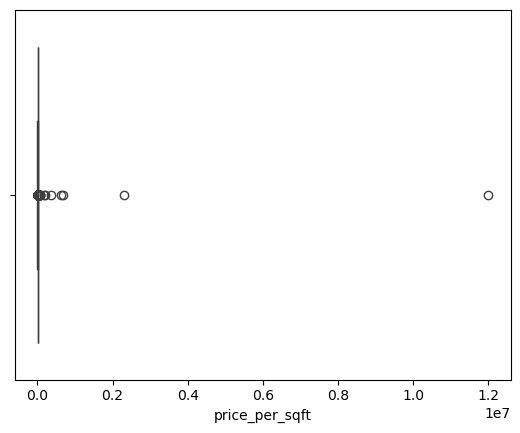

In [66]:
sns.boxplot(x=df1['price_per_sqft'])

## IQR METHOD

In [50]:
q1= df1['price_per_sqft'].quantile(0.25)  # 1st quartile
q3= df1['price_per_sqft'].quantile(0.75) # 3rd quartile
iqr = q3-q1

In [52]:
print('q1:',q1)
print('q3:', q3)
print('IQR:',iqr)

q1: 4312.0
q3: 7461.0
IQR: 3149.0


In [54]:
# gives possible upper limit and lower limits
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
print('UPPER LIMIT:',upper_limit)
print('LOWER LIMIT:',lower_limit)

UPPER LIMIT: 12184.5
LOWER LIMIT: -411.5


In [60]:

# Capping (to remove outliers)
new_df = df1.copy()
new_df.loc[new_df['price_per_sqft'] > upper_limit, 'price_per_sqft'] = upper_limit
new_df.loc[new_df['price_per_sqft'] < lower_limit, 'price_per_sqft'] = lower_limit


<Axes: xlabel='price_per_sqft'>

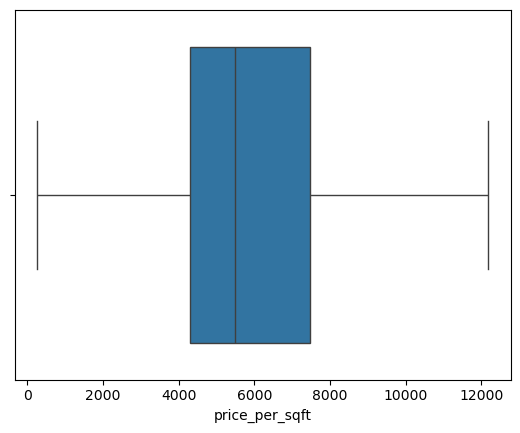

In [62]:
sns.boxplot(x=new_df['price_per_sqft'])
# BOX PLOT AFTER CAPPING

## Q4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. 
## Check the skewness and kurtosis before and after the transformation. (Score:1)

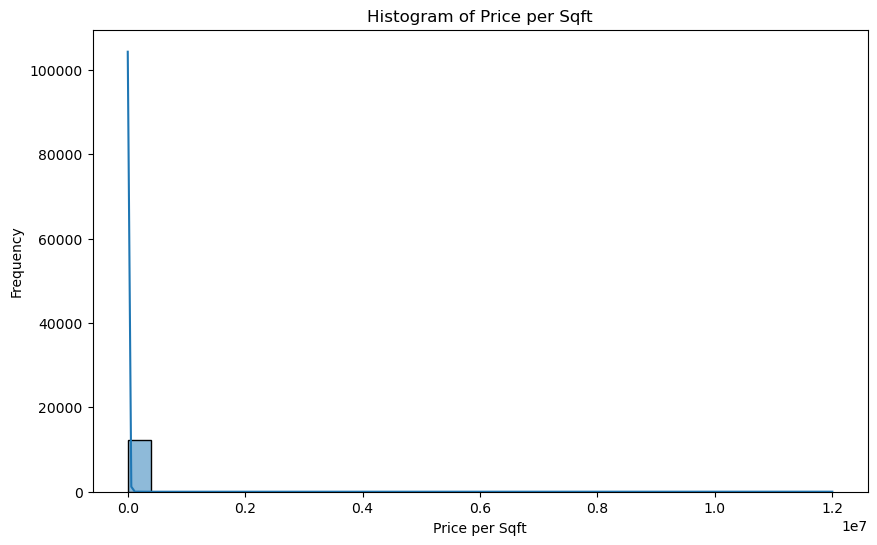

In [331]:
# NOTE : KDE helps us see the shape of the data distribution more clearly,
# especially in identifying patterns, skewness, or multimodal distributions.

plt.figure(figsize=(10, 6))
sns.histplot(df1['price_per_sqft'], bins=30, kde=True)
plt.title('Histogram of Price per Sqft')
plt.xlabel('Price per Sqft')
plt.ylabel('Frequency')
plt.show()

In [333]:
# Check Skewness and Kurtosis Before Transformation

# NOTE : Skewness indicates the asymmetry of the distribution. For normal distribution, skewness should be close to 0.
# NOTE : Kurtosis indicates the "tailedness" of the distribution. For a normal distribution, kurtosis is close to 3.
skewness_before = df1['price_per_sqft'].skew()
kurtosis_before = df1['price_per_sqft'].kurt()
print(f"Skewness before transformation: {skewness_before}")
print(f"Kurtosis before transformation: {kurtosis_before}")


Skewness before transformation: 103.90203228991889
Kurtosis before transformation: 11135.81306761006


NOTE: Skewness = 103.90indicates a very high positive skew. This means that your data is highly right-skewed, with a long tail on the right side.
Kurtosis = 11135.81 is extremely high, indicating a distribution with very heavy tails and likely many outliers.

In [335]:
# Transformation Needed
transformed_price_per_sqft = np.log(df1['price_per_sqft'] + 1)  # Adding 1 to avoid log(0)
# Check if the transformation was successful
print("Transformation successful. Transformed data preview:")
print(transformed_price_per_sqft.head())

Transformation successful. Transformed data preview:
0    8.216088
1    8.437284
2    8.367765
3    8.739697
4    8.354910
Name: price_per_sqft, dtype: float64


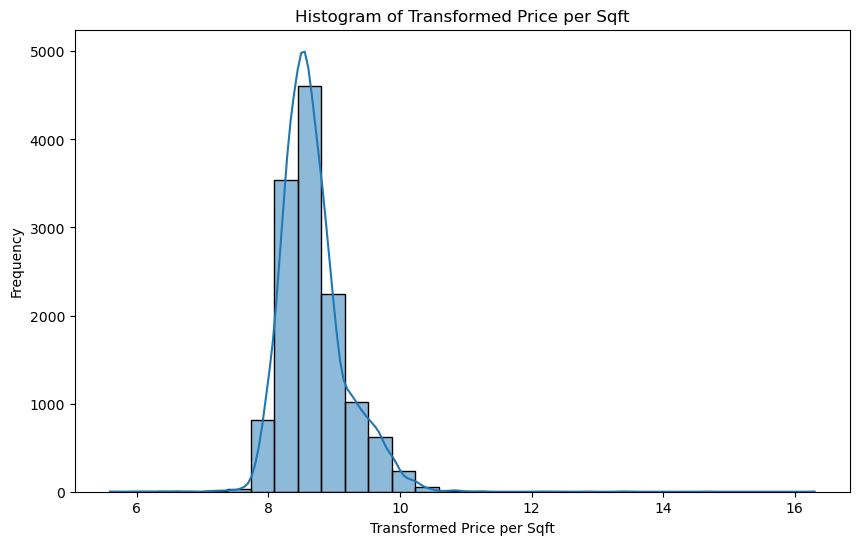

In [161]:
#  histogram of the transformed data
plt.figure(figsize=(10, 6))
sns.histplot(transformed_price_per_sqft, bins=30, kde=True)
plt.title('Histogram of Transformed Price per Sqft')
plt.xlabel('Transformed Price per Sqft')
plt.ylabel('Frequency')
plt.show()


In [337]:
# skewness and kurtosis after transformation
transformed_skewness = skew(transformed_price_per_sqft)
transformed_kurtosis = kurtosis(transformed_price_per_sqft)
print(f'Skewness after transformation: {transformed_skewness}')
print(f'Kurtosis after transformation: {transformed_kurtosis}')

Skewness after transformation: 1.400870354404583
Kurtosis after transformation: 9.404434549652514


## Q5. Check the correlation between all the numerical columns and plot heatmap. (Score:1)


In [339]:
# numerical columns
numerical_columns = ['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft']
df_numerical = df1[numerical_columns]

In [341]:
# correlation matrix
correlation_matrix = df_numerical.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                total_sqft      bath     price       bhk  price_per_sqft
total_sqft        1.000000  0.386694  0.572516  0.339936       -0.008877
bath              0.386694  1.000000  0.448802  0.898875        0.030133
price             0.572516  0.448802  1.000000  0.390008        0.027415
bhk               0.339936  0.898875  0.390008  1.000000        0.030294
price_per_sqft   -0.008877  0.030133  0.027415  0.030294        1.000000


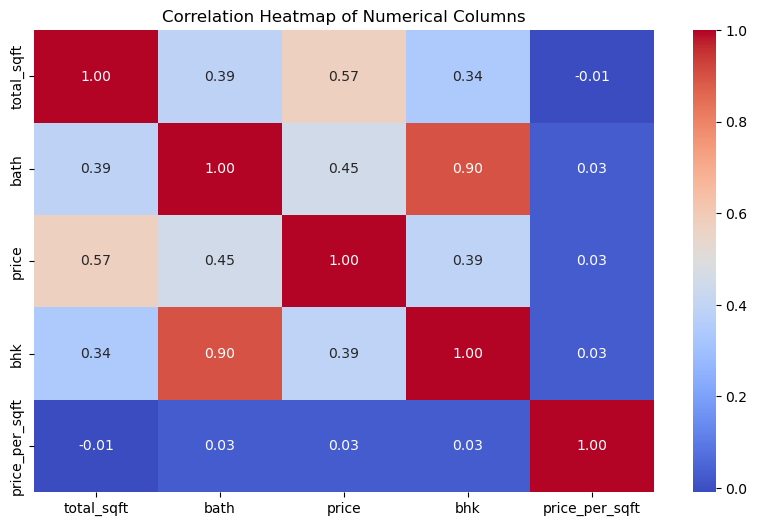

In [343]:
#  heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix,  annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

## Q6. Draw Scatter plot between the variables to check the correlation between them. (Score:1)

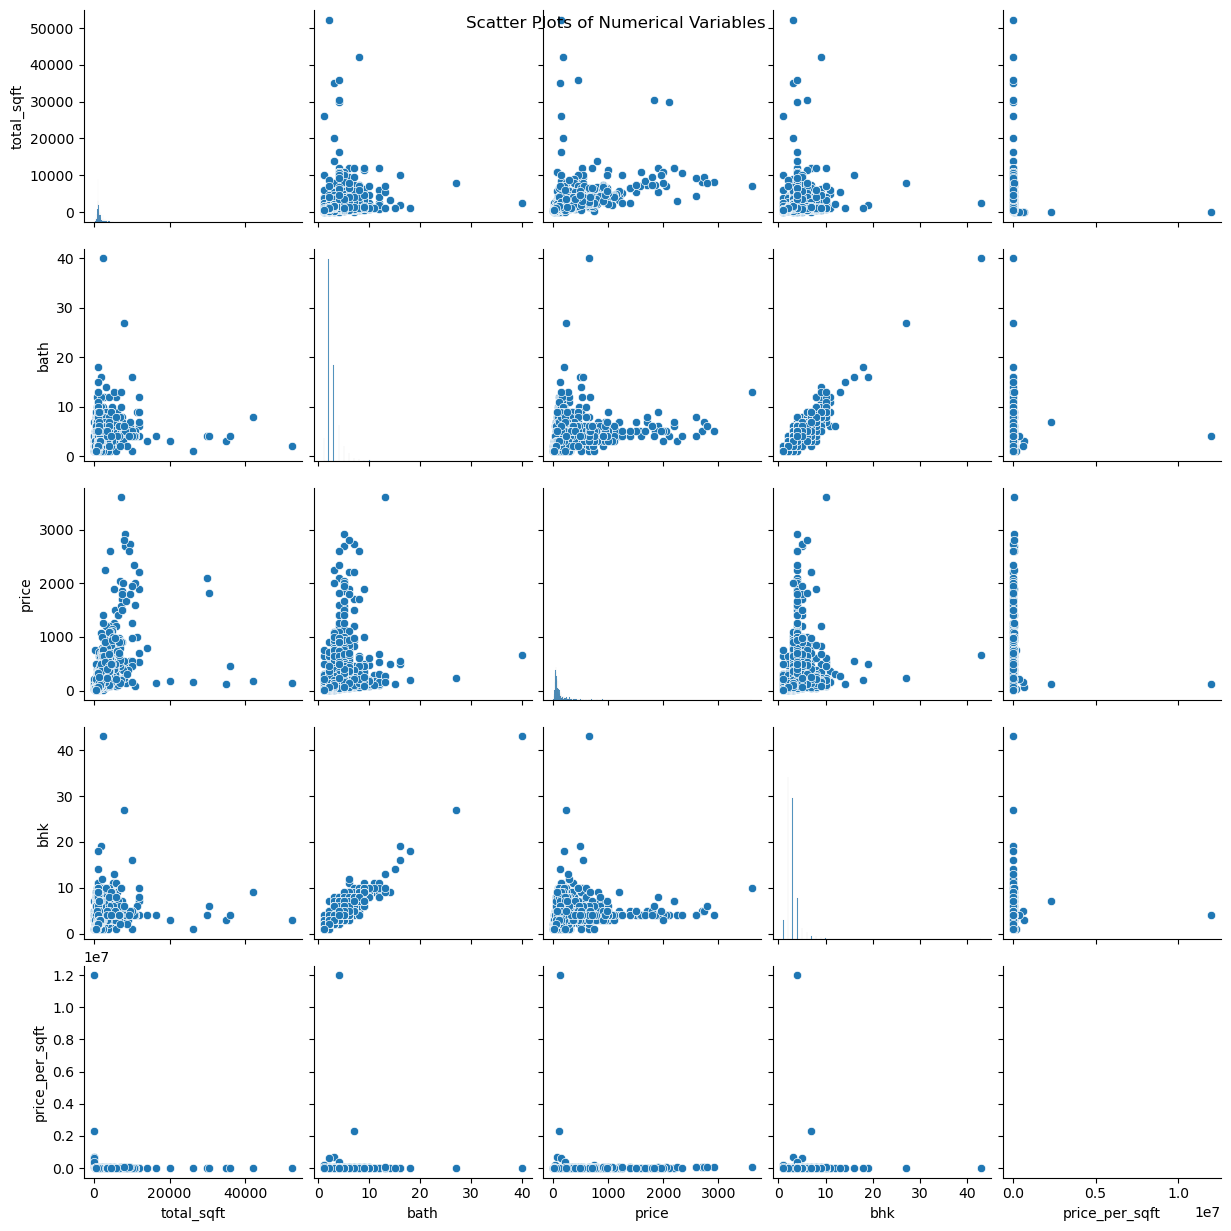

In [51]:
sns.pairplot(df1[numerical_columns])
plt.suptitle('Scatter Plots of Numerical Variables')  # Title adjustment ,y=1.02
plt.show()